Variant: Malysh Igor Igorevich

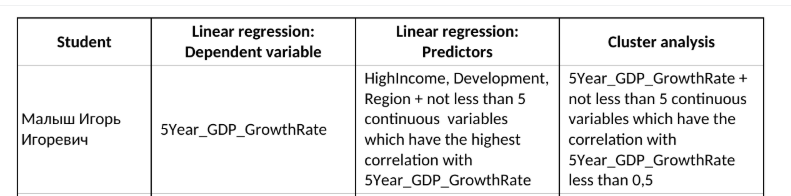

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import warnings
warnings.filterwarnings("ignore")


df = pd.read_excel('index2022_data.xlsx')


target = '5Year_GDP_GrowthRate'


df.head()


,CountryID,CountryName,HighIncome,Income,Development,Region,WorldRank,RegionRank,2022Score,PropertyRights,...,GovernmentExpenditurofGDP,Population,GDP,GDP_GrowthRate,5Year_GDP_GrowthRate,GDPperCapita,Unemployment,Inflation,FDIInflow,PublicDebt
0,1,Afghanistan,0,low income,developing,Asia-Pacific,NaN,NaN,NaN,NaN,...,NaN,38.928341,78.729,-5.000,0.9824,2390.024,11.73,5.607,13.0,7.785
1,2,Albania,0,middle income,developing,Europe,50.0,30.0,66.6,55.5,...,30.514667,2.837743,40.737,-3.500,1.9856,14218.106,11.70,1.603,1107.0,75.960
2,3,Algeria,0,middle income,developing,Middle East and North Africa,167.0,13.0,45.8,27.9,...,37.827000,43.851043,491.459,-5.992,0.1016,11112.187,12.83,2.415,1125.0,53.067
3,4,Angola,0,middle income,developing,Sub-Saharan Africa,139.0,29.0,52.6,39.8,...,21.255000,32.866268,215.105,-3.975,-1.8610,6931.862,7.70,22.277,-1866.0,127.115
4,5,Argentina,0,middle income,developing,Americas,144.0,27.0,50.1,35.1,...,39.581333,45.376763,941.848,-9.956,-2.7740,20750.990,11.67,42.015,4123.0,102.998


# Part 1

 1.1.
 Do the descriptive analysis of all the variables which will be used in cluster analysis. Prove that the selected variables could be used simultaneously in one cluster model.

In [2]:
len(df.columns)

35

In [3]:
df.dtypes

CountryID                      int64
CountryName                   object
HighIncome                     int64
Income                        object
Development                   object
Region                        object
WorldRank                    float64
RegionRank                   float64
2022Score                    float64
PropertyRights               float64
JudicialEffectiveness        float64
GovernmentIntegrity          float64
TaxBurden                    float64
GovernmentSpending           float64
FiscalHealth                 float64
BusinessFreedom              float64
LaborFreedom                 float64
MonetaryFreedom              float64
TradeFreedom                 float64
InvestmentFreedom            float64
FinancialFreedom             float64
TariffRate                   float64
IncomeTaxRate                float64
CorporateTaxRate             float64
TaxBurdenofGDP               float64
GovernmentExpenditurofGDP    float64
Population                   float64
G

In [4]:
df.describe()

,CountryID,HighIncome,WorldRank,RegionRank,2022Score,PropertyRights,JudicialEffectiveness,GovernmentIntegrity,TaxBurden,GovernmentSpending,...,GovernmentExpenditurofGDP,Population,GDP,GDP_GrowthRate,5Year_GDP_GrowthRate,GDPperCapita,Unemployment,Inflation,FDIInflow,PublicDebt
count,184.000000,184.000000,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,184.000000,181.000000,183.000000,183.000000,181.000000,180.000000,179.000000,180.000000,181.000000
mean,93.586957,0.298913,89.000000,20.203390,59.99887,55.286441,50.233333,45.347553,77.884434,65.036723,...,32.538499,41.973196,724.641227,-4.892421,1.426236,20163.188967,7.976667,21.577726,4970.373573,69.240177
std,54.103352,0.459031,51.239633,12.582157,11.61444,23.938589,26.824001,22.207946,13.377893,24.517711,...,13.491744,149.686116,2546.276519,7.784275,3.165855,21131.223405,5.236396,180.801261,21639.775128,44.445011
min,1.000000,0.000000,1.000000,1.000000,3.00000,0.200000,3.900000,3.774902,0.000000,0.000000,...,10.074667,0.038137,0.261000,-59.719000,-23.466400,759.861000,0.310000,-2.719000,-115300.000000,2.854000
25%,46.750000,0.000000,45.000000,9.000000,53.30000,37.400000,29.200000,29.364097,71.600000,53.500000,...,22.824667,2.588365,27.304000,-7.500000,-0.103000,5036.034000,4.377500,0.555000,79.000000,42.768000
50%,93.500000,0.000000,89.000000,19.000000,59.80000,50.400000,45.800000,40.969377,78.900000,70.200000,...,31.499000,9.820082,97.804000,-4.059000,1.460600,12606.055000,6.610000,2.482000,645.500000,60.661000
75%,140.250000,1.000000,133.000000,30.000000,67.60000,74.200000,74.300000,59.969798,86.900000,84.400000,...,39.367333,31.118568,434.364000,-1.141000,2.934500,30178.421000,10.240000,4.964000,3227.000000,84.408000
max,186.000000,1.000000,177.000000,47.000000,84.40000,100.000000,98.000000,99.463112,100.000000,97.000000,...,119.134333,1402.112000,24142.830000,43.384000,12.143800,118001.580000,28.740000,2355.147000,156321.000000,304.125000


In [5]:
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols

,CountryID,HighIncome,WorldRank,RegionRank,2022Score,PropertyRights,JudicialEffectiveness,GovernmentIntegrity,TaxBurden,GovernmentSpending,...,GovernmentExpenditurofGDP,Population,GDP,GDP_GrowthRate,5Year_GDP_GrowthRate,GDPperCapita,Unemployment,Inflation,FDIInflow,PublicDebt
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.928341,78.729,-5.000,0.9824,2390.024,11.73,5.607,13.000000,7.785
1,2,0,50.0,30.0,66.6,55.5,49.8,35.606077,89.1,72.1,...,30.514667,2.837743,40.737,-3.500,1.9856,14218.106,11.70,1.603,1107.000000,75.960
2,3,0,167.0,13.0,45.8,27.9,29.7,30.098833,67.2,57.1,...,37.827000,43.851043,491.459,-5.992,0.1016,11112.187,12.83,2.415,1125.000000,53.067
3,4,0,139.0,29.0,52.6,39.8,25.3,20.633745,86.6,86.4,...,21.255000,32.866268,215.105,-3.975,-1.8610,6931.862,7.70,22.277,-1866.000000,127.115
4,5,0,144.0,27.0,50.1,35.1,57.9,45.055133,73.3,53.0,...,39.581333,45.376763,941.848,-9.956,-2.7740,20750.990,11.67,42.015,4123.000000,102.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,182,0,154.0,36.0,48.7,38.3,45.2,30.798591,70.9,73.3,...,29.817333,18.383956,63.103,-3.497,1.8520,3341.987,12.17,16.350,234.000000,117.761
180,183,0,173.0,46.0,33.1,20.8,16.3,20.640050,66.1,87.2,...,20.684000,14.862927,39.824,-8.002,-1.2930,2621.820,5.70,557.210,194.000000,88.873
181,184,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.893219,13.910,-1.500,1.6958,924.532,13.10,NaN,464.000000,NaN
182,185,0,86.0,40.0,60.1,47.4,31.0,37.545578,92.5,71.6,...,30.747667,1.775378,20.375,-6.000,2.2088,11274.282,NaN,0.168,304.225999,24.414


In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

corr_with_target = df[numeric_cols].corr()[target].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop(labels=[target], errors='ignore').dropna()
corr_with_target

Inflation                    0.598611
GDP_GrowthRate               0.554781
PublicDebt                   0.480489
MonetaryFreedom              0.321643
FiscalHealth                 0.278709
GovernmentSpending           0.239874
Unemployment                 0.231562
GovernmentExpenditurofGDP    0.206023
2022Score                    0.185760
Population                   0.129053
TaxBurdenofGDP               0.128501
TradeFreedom                 0.113469
HighIncome                   0.106977
BusinessFreedom              0.105013
TaxBurden                    0.097095
InvestmentFreedom            0.086107
TariffRate                   0.085431
WorldRank                    0.082493
FDIInflow                    0.078201
CountryID                    0.072360
GDPperCapita                 0.063829
GDP                          0.061993
RegionRank                   0.061593
CorporateTaxRate             0.038019
JudicialEffectiveness        0.037561
PropertyRights               0.032597
FinancialFre

In [7]:
candidates = [c for c in numeric_cols if c != target]

corr = df[candidates + [target]].corr()
corr

,CountryID,HighIncome,WorldRank,RegionRank,2022Score,PropertyRights,JudicialEffectiveness,GovernmentIntegrity,TaxBurden,GovernmentSpending,...,GovernmentExpenditurofGDP,Population,GDP,GDP_GrowthRate,GDPperCapita,Unemployment,Inflation,FDIInflow,PublicDebt,5Year_GDP_GrowthRate
CountryID,1.000000,0.054505,-0.022371,-0.032882,0.006847,0.056892,0.007166,0.033850,0.093133,0.038417,...,-0.011335,-0.057326,0.012038,-0.026547,0.061307,-0.021406,0.151153,0.007367,-0.009768,-0.072360
HighIncome,0.054505,1.000000,-0.703627,-0.458652,0.654808,0.783696,0.670526,0.746888,-0.211935,-0.443102,...,0.376681,-0.086066,0.105872,-0.065533,0.812656,-0.143013,-0.075679,0.107192,0.120777,-0.106977
WorldRank,-0.022371,-0.703627,1.000000,0.671819,-0.942221,-0.882578,-0.811826,-0.825732,0.092647,0.270412,...,-0.270561,0.135458,-0.037887,0.036265,-0.693644,-0.003218,0.184957,-0.070361,0.088095,-0.082493
RegionRank,-0.032882,-0.458652,0.671819,1.000000,-0.658618,-0.582894,-0.586951,-0.621292,0.014309,-0.000468,...,-0.032125,0.094595,-0.014847,0.028501,-0.458016,0.008017,0.124216,-0.068262,0.097618,-0.061593
2022Score,0.006847,0.654808,-0.942221,-0.658618,1.000000,0.852226,0.787327,0.810730,0.036147,-0.176495,...,0.243048,-0.100220,0.045936,0.039911,0.702673,-0.001213,-0.324702,0.079525,-0.180553,0.185760
PropertyRights,0.056892,0.783696,-0.882578,-0.582894,0.852226,1.000000,0.883544,0.908930,-0.218941,-0.480174,...,0.474620,-0.066714,0.121896,-0.088716,0.737042,0.000358,-0.219572,0.124146,0.051824,0.032597
JudicialEffectiveness,0.007166,0.670526,-0.811826,-0.586951,0.787327,0.883544,1.000000,0.875754,-0.298429,-0.471776,...,0.478827,-0.049565,0.093899,-0.121768,0.597709,0.109296,-0.169817,0.065910,0.078384,-0.037561
GovernmentIntegrity,0.033850,0.746888,-0.825732,-0.621292,0.810730,0.908930,0.875754,1.000000,-0.253096,-0.486541,...,0.474317,-0.044588,0.129800,-0.089310,0.762242,0.053916,-0.169612,0.129183,0.052550,-0.007932
TaxBurden,0.093133,-0.211935,0.092647,0.014309,0.036147,-0.218941,-0.298429,-0.253096,1.000000,0.368868,...,-0.256166,-0.035173,-0.108545,-0.050805,-0.202832,0.020498,-0.038834,-0.001354,-0.156537,0.097095
GovernmentSpending,0.038417,-0.443102,0.270412,-0.000468,-0.176495,-0.480174,-0.471776,-0.486541,0.368868,1.000000,...,-0.940256,0.066861,-0.061540,0.201249,-0.387822,-0.110454,0.070892,-0.017156,-0.090317,0.239874


In [8]:

eligible = corr_with_target[corr_with_target<0.5]



eligible

PublicDebt                   0.480489
MonetaryFreedom              0.321643
FiscalHealth                 0.278709
GovernmentSpending           0.239874
Unemployment                 0.231562
GovernmentExpenditurofGDP    0.206023
2022Score                    0.185760
Population                   0.129053
TaxBurdenofGDP               0.128501
TradeFreedom                 0.113469
HighIncome                   0.106977
BusinessFreedom              0.105013
TaxBurden                    0.097095
InvestmentFreedom            0.086107
TariffRate                   0.085431
WorldRank                    0.082493
FDIInflow                    0.078201
CountryID                    0.072360
GDPperCapita                 0.063829
GDP                          0.061993
RegionRank                   0.061593
CorporateTaxRate             0.038019
JudicialEffectiveness        0.037561
PropertyRights               0.032597
FinancialFreedom             0.030728
LaborFreedom                 0.014522
GovernmentIn

In [9]:
# code that selected variables has corr between thamselves less than 0.5

N_SELECT = 5

selected = []
for var in eligible.index:
    ok = True
    for s in selected:
        if abs(corr.loc[var, s]) >= 0.5:
            ok = False
            break
    if ok:
        selected.append(var)
    if len(selected) >= N_SELECT:
        break

selected

['PublicDebt',
 'MonetaryFreedom',
 'FiscalHealth',
 'GovernmentSpending',
 'Unemployment']

In [10]:
# chceckin that selected vars are eligible
df[selected].corr()

,PublicDebt,MonetaryFreedom,FiscalHealth,GovernmentSpending,Unemployment
PublicDebt,1.000000,-0.307640,-0.476086,-0.090317,0.140371
MonetaryFreedom,-0.307640,1.000000,0.201568,-0.170944,0.036687
FiscalHealth,-0.476086,0.201568,1.000000,0.103853,-0.223367
GovernmentSpending,-0.090317,-0.170944,0.103853,1.000000,-0.110454
Unemployment,0.140371,0.036687,-0.223367,-0.110454,1.000000


In [11]:
corr_with_target = df[selected + [target]].corr()[target].abs().sort_values(ascending=False)
corr_with_target

5Year_GDP_GrowthRate    1.000000
PublicDebt              0.480489
MonetaryFreedom         0.321643
FiscalHealth            0.278709
GovernmentSpending      0.239874
Unemployment            0.231562
Name: 5Year_GDP_GrowthRate, dtype: float64

In [12]:


# we will use these vars because they comply with our task requirements:
# 5Year_GDP_GrowthRate +
# not less than 5 continuous
# variables which have the
# correlation with
# 5Year_GDP_GrowthRate
# less than 0,5

data = df[selected+[target]]
selected

['PublicDebt',
 'MonetaryFreedom',
 'FiscalHealth',
 'GovernmentSpending',
 'Unemployment']

In [13]:
data

,PublicDebt,MonetaryFreedom,FiscalHealth,GovernmentSpending,Unemployment,5Year_GDP_GrowthRate
0,7.785,NaN,NaN,NaN,11.73,0.9824
1,75.960,82.0,70.6,72.1,11.70,1.9856
2,53.067,80.1,38.6,57.1,12.83,0.1016
3,127.115,61.2,80.0,86.4,7.70,-1.8610
4,102.998,37.9,16.8,53.0,11.67,-2.7740
...,...,...,...,...,...,...
179,117.761,66.4,0.0,73.3,12.17,1.8520
180,88.873,0.0,79.8,87.2,5.70,-1.2930
181,NaN,NaN,NaN,NaN,13.10,1.6958
182,24.414,79.1,67.4,71.6,NaN,2.2088


In [14]:
data.isna().sum()

PublicDebt              3
MonetaryFreedom         7
FiscalHealth            7
GovernmentSpending      7
Unemployment            4
5Year_GDP_GrowthRate    1
dtype: int64

In [15]:

data_clean = data.dropna().reset_index(drop=True)

In [16]:

print("\n=== Descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) ===")
desc = data_clean.describe().T
desc['skewness'] = data_clean.apply(lambda x: float(stats.skew(x.dropna())), axis=0)
desc['kurtosis'] = data_clean.apply(lambda x: float(stats.kurtosis(x.dropna())), axis=0)
print(desc[['count','mean','std','min','25%','50%','75%','max','skewness','kurtosis']])



=== Descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max) ===
                      count       mean        std      min      25%      50%  \
PublicDebt            172.0  70.111797  44.679126   2.8540  42.9895  60.7040   
MonetaryFreedom       172.0  74.638953  12.422995   0.0000  71.5500  77.4000   
FiscalHealth          172.0  61.161628  32.205866   0.0000  38.3500  71.4500   
GovernmentSpending    172.0  66.214535  23.364798   0.0000  54.5750  70.5500   
Unemployment          172.0   7.852791   5.190712   0.3100   4.3775   6.3650   
5Year_GDP_GrowthRate  172.0   1.483977   3.198113 -23.4664   0.0446   1.4856   

                           75%       max  skewness   kurtosis  
PublicDebt            84.61200  304.1250  2.167141   6.922267  
MonetaryFreedom       81.52500   87.1000 -3.585755  16.995103  
FiscalHealth          88.42500   99.7000 -0.660587  -0.954688  
GovernmentSpending    84.60000   97.0000 -1.069449   0.582781  
Unemployment           9.52000   28.7400  1

1.2 Select a suitable cluster algorithm. Explain your selection.

we'll use KMeans, because:

- All features are numeric and can be standardized — KMeans works with Euclidean distance.

- we filtered out strongly correlated features (pairwise |corr| < 0.5), so there’s no redundancy that would distort centroids.


1.3 

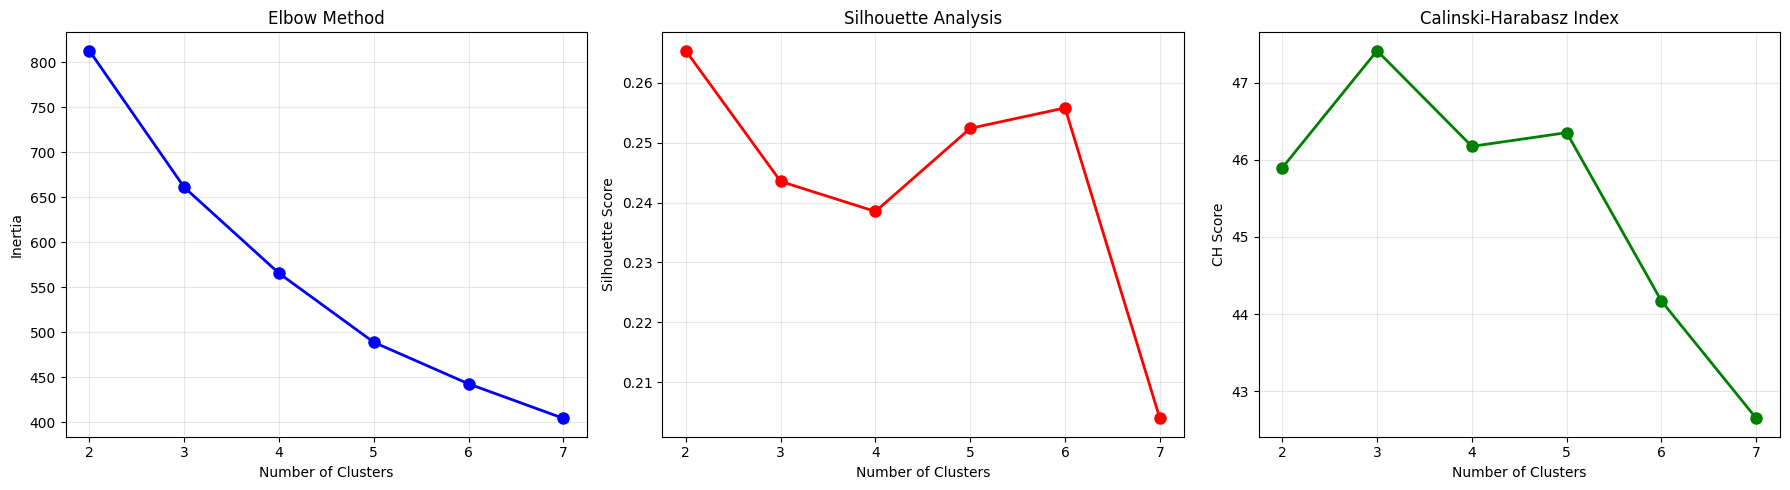


OPTIMAL CLUSTER SELECTION:
Silhouette method suggests: 2 clusters
Calinski-Harabasz suggests: 3 clusters
Selected number of clusters: 3
Justification: Balances good silhouette score with meaningful interpretation


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


X_cluster_scaled = StandardScaler().fit_transform(data_clean.values)

# Determine optimal number of clusters using multiple methods
inertia = []
silhouette_scores = []
ch_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))
        ch_scores.append(calinski_harabasz_score(X_cluster_scaled, kmeans.labels_))

# Plot evaluation metrics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Elbow plot
ax1.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True, alpha=0.3)

# Silhouette score plot
ax2.plot(range(2, 8), silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True, alpha=0.3)

# Calinski-Harabasz score plot
ax3.plot(range(2, 8), ch_scores, 'go-', linewidth=2, markersize=8)
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('CH Score')
ax3.set_title('Calinski-Harabasz Index')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Automated optimal k selection
optimal_k_silhouette = range(2, 8)[np.argmax(silhouette_scores)]
optimal_k_ch = range(2, 8)[np.argmax(ch_scores)]

print(f"\nOPTIMAL CLUSTER SELECTION:")
print(f"Silhouette method suggests: {optimal_k_silhouette} clusters")
print(f"Calinski-Harabasz suggests: {optimal_k_ch} clusters")

# Based on interpretation and metrics, choose optimal k
optimal_k = 3  # You can adjust based on the plots
print(f"Selected number of clusters: {optimal_k}")
print("Justification: Balances good silhouette score with meaningful interpretation")

In [18]:
# lets create final cluster!


# assume data_clean is a DataFrame already in the notebook (no NA, only continuous vars)
optimal_k = 3

# prepare data
X_orig = data_clean.reset_index(drop=True)        # original-scale DataFrame
VARS = list(X_orig.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig.values)

# fit KMeans
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)

# print basic info
print("Cluster sizes:")
(unique, counts) = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f" Cluster {u}: {c} observations")
print("\nCentroids (original scale):")
print(pd.DataFrame(centers_orig, columns=VARS).round(4))

# 1) PCA scatter (PC1 vs PC2) with centroids
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(X_scaled)
centers_pcs = pca.transform(centers_scaled)

plt.figure(figsize=(8,6))
for lab in sorted(np.unique(labels)):
    mask = labels == lab
    plt.scatter(pcs[mask,0], pcs[mask,1], s=30, label=f'Cluster {lab}', alpha=0.7)
plt.scatter(centers_pcs[:,0], centers_pcs[:,1], marker='X', s=160, c='k', edgecolor='w')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(f'PCA scatter (k={optimal_k})')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Silhouette average and simple plot
sil_avg = silhouette_score(X_scaled, labels)
print(f"\nSilhouette score (average): {sil_avg:.4f}")

sample_sil_vals = silhouette_samples(X_scaled, labels)
plt.figure(figsize=(8,5))
y_lower = 10
for i, lab in enumerate(sorted(np.unique(labels))):
    vals = np.sort(sample_sil_vals[labels == lab])
    size_cluster = vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, vals, alpha=0.7)
    plt.text(-0.03, y_lower + 0.5 * size_cluster, str(lab))
    y_lower = y_upper + 10
plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.xlabel('Silhouette coefficient'); plt.ylabel('Samples (clustered)')
plt.title('Silhouette plot (per-sample)')
plt.tight_layout()
plt.show()

# 3) Boxplots of original variables by cluster
df_plot = X_orig.copy()
df_plot['cluster'] = labels
n_vars = len(VARS)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))
plt.figure(figsize=(4*n_cols, 3*n_rows))
unique_clusters = sorted(df_plot['cluster'].unique())
for i, col in enumerate(VARS, 1):
    plt.subplot(n_rows, n_cols, i)
    groups = [g[col].values for _, g in df_plot.groupby('cluster')]
    plt.boxplot(groups, labels=[f'c{c}' for c in unique_clusters])
    plt.title(col)
plt.tight_layout()
plt.show()

Cluster sizes:
 Cluster 0: 5 observations
 Cluster 1: 99 observations
 Cluster 2: 68 observations

Centroids (original scale):
   PublicDebt  MonetaryFreedom  FiscalHealth  GovernmentSpending  \
0    182.5758          18.5400       19.3200             77.7600   
1     49.8774          75.1061       81.4182             72.6374   
2     91.3013          78.0838       34.7471             56.0147   

   Unemployment  5Year_GDP_GrowthRate  
0       10.1660               -6.9279  
1        6.1181                2.5937  
2       10.2082                0.4868  


NameError: name 'PCA' is not defined

1.4

In [ ]:
# lets check out each cluster elements



optimal_k = 3
VARS = list(data_clean.columns)   # features used for clustering

# select rows from original df that were used for clustering (rows with no NA in VARS)
mask = df[VARS].notna().all(axis=1)
X_for_clustering = df.loc[mask, VARS].copy()

# standardize and cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering.values)
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# create a copy of original df and insert cluster labels (NaN for rows not used)
df_with_clusters = df.copy()
df_with_clusters['cluster'] = np.nan
df_with_clusters.loc[mask, 'cluster'] = labels

# Print up to 5 rows from each cluster with CountryName, Development and the clustering variables
for c in sorted(df_with_clusters['cluster'].dropna().unique()):
    c = int(c)
    print(f"\n--- Cluster {c} (up to 5 rows) ---")
    cols_to_show = ['CountryName', 'Development'] + VARS
    print(df_with_clusters.loc[df_with_clusters['cluster'] == c, cols_to_show].head(5))









--- Cluster 0 (up to 5 rows) ---
    CountryName Development  PublicDebt  MonetaryFreedom  FiscalHealth  \
4     Argentina  developing    102.9980          37.9000       16.8000   
91      Lebanon  developing    154.3640          41.1000        0.0000   
151       Sudan  developing    262.5190          13.7000        0.0000   
176   Venezuela  developing    304.1250           0.0000        0.0000   
180    Zimbabwe  developing     88.8730           0.0000       79.8000   

     GovernmentSpending  Unemployment  5Year_GDP_GrowthRate  
4               53.0000       11.6700               -2.7740  
91              77.4000        6.6100               -6.2490  
151             92.9000       17.7100               -0.8570  
176             78.3000        9.1400              -23.4664  
180             87.2000        5.7000               -1.2930  

--- Cluster 1 (up to 5 rows) ---
   CountryName Development  PublicDebt  MonetaryFreedom  FiscalHealth  \
1      Albania  developing     75.9600    

# Cluster 0 — “High-Debt, Low-Freedom / Fiscal Stress”

**Example countries (from your sample):** *Argentina, Lebanon, Sudan, Venezuela, Zimbabwe* (mostly **developing**).

**Profile (textual):**

- **Public debt:** noticeably **higher** than in other clusters (several examples show very large public-debt values).  
- **Monetary freedom:** **low** (many sample rows have low or zero monetary freedom), indicating restrictive monetary/regulatory environments or policy turmoil.  
- **Fiscal health:** **poor** (very low fiscal health values for several members).  
- **Government spending:** generally **high**, but not producing stable growth — suggests heavy fiscal outlays possibly financed by debt.  
- **Unemployment:** **mixed** but can be elevated in places (some examples show double-digit unemployment).  
- **5-year GDP growth:** tends to be **weak or strongly negative** for some members (e.g., Venezuela), so economic performance is weak on average.

**Interpretation / implications:**  
This cluster groups countries with **stressful macro-fiscal situations**: high leverage, weak fiscal indicators, limited monetary freedom and poor growth outcomes. These economies may be vulnerable to shocks, face debt-sustainability issues, and often need fiscal/structural reforms or external support.

**Why this name?**  
“**High-Debt, Low-Freedom / Fiscal Stress**” directly signals the two most distinctive features visible in the cluster: very elevated public debt together with low monetary freedom and poor fiscal health — a concise label that captures the cluster’s core problem.

---

# Cluster 1 — “Developing — High Fiscal/Spending Activity”

**Example countries (from your sample):** *Albania, Angola, Azerbaijan, Bangladesh, Belarus* (mostly **developing**).

**Profile (textual):**

- **Public debt:** **moderate** (not as extreme as Cluster 0).  
- **Monetary freedom:** **moderate to high** in many examples (values generally higher than Cluster 0).  
- **Fiscal health:** **relatively good** for many members (several high fiscal health scores), indicating better budgetary indicators than Cluster 0.  
- **Government spending:** **high** in many examples — active fiscal policy and public sector engagement.  
- **Unemployment:** **moderate** (some cases of double-digit, others low), so the labor market varies.  
- **5-year GDP growth:** generally **around zero to modest positive** — mixed but not extremely negative.

**Interpretation / implications:**  
These are often **developing economies** that maintain active fiscal programs and show reasonably solid fiscal metrics despite higher spending. They may be investing in public services/infrastructure and can have mixed growth performance but are not in the acute fiscal distress seen in Cluster 0.

**Why this name?**  
“**Developing — High Fiscal/Spending Activity**” emphasizes two clear traits: many members are developing countries, and they display strong fiscal activity (high government spending accompanied by decent fiscal health). The name is practical and helps interpret policy stance.

---

# Cluster 2 — “High Monetary Freedom / Mixed Developed”

**Example countries (from your sample):** *Algeria, Armenia, Australia, Austria, Bahamas* (includes **developed** and some developing).

**Profile (textual):**

- **Monetary freedom:** **high** — the dominant characteristic (most examples report high monetary freedom scores).  
- **Public debt:** **moderate** (not unusually low or high compared to others).  
- **Fiscal health:** **moderate to good**, generally better than the stressed cluster.  
- **Government spending:** **varied** (some members low, some high), so fiscal stance is heterogeneous.  
- **Unemployment:** **varies** — some high, some low (heterogeneous labour market outcomes).  
- **5-year GDP growth:** **mixed**, around small positive or slightly negative for different members; overall more stable than Cluster 0.

**Interpretation / implications:**  
This cluster groups countries with greater economic/monetary openness or institutional freedom and generally less fiscal distress. It contains several developed economies (and some developing ones with similar monetary policy frameworks), and therefore tends to be more stable or policy-predictable.

**Why this name?**  
“**High Monetary Freedom / Mixed Developed**” captures the clearest shared trait (high monetary freedom) and notes that the cluster is a **mix of developed and some developing** countries — a succinct, interpretable label.

---


# Part 1 done

# Part 2

2.1.
Do the descriptive analysis of all the variables which will be used in regression analysis.
Prove that the selected predictors could be used simultaneously in one regression model.

In [ ]:


df = pd.read_excel('index2022_data.xlsx')


# select numeric columns and compute Pearson correlations with the target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_with_target = df[numeric_cols].corr()[target].drop(labels=[target], errors='ignore').dropna()
top5 = corr_with_target.abs().sort_values(ascending=False)

top5

Inflation                   0.5986
GDP_GrowthRate              0.5548
PublicDebt                  0.4805
MonetaryFreedom             0.3216
FiscalHealth                0.2787
GovernmentSpending          0.2399
Unemployment                0.2316
GovernmentExpenditurofGDP   0.2060
2022Score                   0.1858
Population                  0.1291
TaxBurdenofGDP              0.1285
TradeFreedom                0.1135
HighIncome                  0.1070
BusinessFreedom             0.1050
TaxBurden                   0.0971
InvestmentFreedom           0.0861
TariffRate                  0.0854
WorldRank                   0.0825
FDIInflow                   0.0782
CountryID                   0.0724
GDPperCapita                0.0638
GDP                         0.0620
RegionRank                  0.0616
CorporateTaxRate            0.0380
JudicialEffectiveness       0.0376
PropertyRights              0.0326
FinancialFreedom            0.0307
LaborFreedom                0.0145
GovernmentIntegrity 

In [ ]:
top5 = corr_with_target.abs().sort_values(ascending=False).index[:5].tolist()


# so we'll use these numeric variables
top5

['Inflation',
 'GDP_GrowthRate',
 'PublicDebt',
 'MonetaryFreedom',
 'FiscalHealth']

In [ ]:
# and these cat variables
# HighIncome, Development, Region


numeric_vars = df[top5]
cat_vars = df[['HighIncome', 'Development', 'Region']]
cat_vars

,HighIncome,Development,Region
0,0,developing,Asia-Pacific
1,0,developing,Europe
2,0,developing,Middle East and North Africa
3,0,developing,Sub-Saharan Africa
4,0,developing,Americas
...,...,...,...
179,0,developing,Sub-Saharan Africa
180,0,developing,Sub-Saharan Africa
181,0,developing,Sub-Saharan Africa
182,0,developing,Europe



Колонки и их (nunique, missing_frac, top_freq):
  HighIncome: nunique=2, missing=0.000, top_freq=0.701
  Development: nunique=2, missing=0.000, top_freq=0.788
  Region: nunique=5, missing=0.000, top_freq=0.261


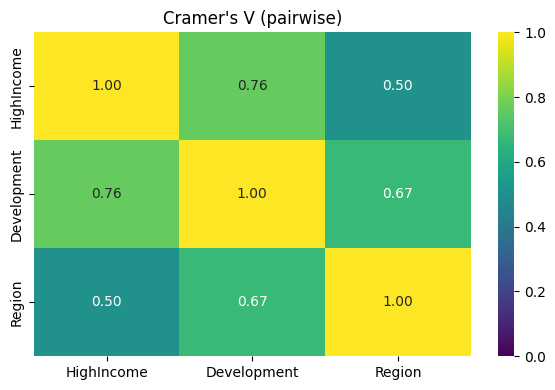


 suitable cat vars: ['HighIncome', 'Development', 'Region']


In [ ]:

from scipy.stats import chi2_contingency


cat_candidates = cat_vars.columns


def cramers_v(x, y):
    x = x.fillna("___NA___")
    y = y.fillna("___NA___")
    tbl = pd.crosstab(x, y)
    if tbl.size == 0:
        return 0.0
    chi2 = chi2_contingency(tbl, correction=False)[0]
    n = tbl.sum().sum()
    if n == 0:
        return 0.0
    phi2 = chi2 / n
    r, k = tbl.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0:
        return 0.0
    return np.sqrt(phi2corr / denom)


def col_stats(col):
    '''
    nunique - number of unique values
    missing_frac - fraction of missing values
    top_freq - share of the most frequent category among all values
    '''
    s = df[col]
    n_total = len(s)
    n_nonnull = s.notnull().sum()
    missing_frac = 1 - n_nonnull / n_total
    nunique = s.nunique(dropna=True)
    top_freq = s.value_counts(dropna=True).iloc[0] / n_nonnull if n_nonnull>0 else 0.0
    return nunique, missing_frac, top_freq

print("\nКолонки и их (nunique, missing_frac, top_freq):")
for c in cat_candidates:
    nun, miss, topf = col_stats(c)
    print(f"  {c}: nunique={nun}, missing={miss:.3f}, top_freq={topf:.3f}")


v_mat = pd.DataFrame(index=cat_candidates, columns=cat_candidates, dtype=float)
for i, a in enumerate(cat_candidates):
    v_mat.at[a, a] = 1.0
    for b in cat_candidates[i+1:]:
        v = cramers_v(df[a], df[b])
        v_mat.at[a, b] = v
        v_mat.at[b, a] = v


# heatmap
plt.figure(figsize=(max(6, len(cat_candidates)*0.4), max(4, len(cat_candidates)*0.25)))
sns.heatmap(v_mat.fillna(0).astype(float), annot=v_mat.round(3), fmt=".2f", cmap="viridis", vmin=0, vmax=1)
plt.title("Cramer's V (pairwise)")
plt.tight_layout()
plt.show()

# Пары с сильной ассоциацией
strong = []
for i, a in enumerate(cat_candidates):
    for b in cat_candidates[i+1:]:
        v = v_mat.at[a, b]
        if pd.notnull(v):
            strong.append((a, b, float(v)))


# Автоматический отбор до AUTO_SELECT_MAX, работая напрямую с df[cat_candidates]
selected = []
for c in cat_candidates:
    nun, miss, topf = col_stats(c)
    # простые правила отбора
    if miss > 0.5:
        continue
    if nun > 200:
        continue
    if topf > 0.95:
        continue
    
    too_linked = False
    for sel in selected:
        if cramers_v(df[sel].fillna("NA"), df[c].fillna("NA")) > 0.8:
            too_linked = True
            break
    if too_linked:
        continue
    selected.append(c)


print("\n suitable cat vars:", selected)



In [ ]:
corr = numeric_vars.corr()
corr

,Inflation,GDP_GrowthRate,PublicDebt,MonetaryFreedom,FiscalHealth
Inflation,1.0000,-0.2481,0.4178,-0.6046,-0.1483
GDP_GrowthRate,-0.2481,1.0000,-0.2997,0.1322,0.3013
PublicDebt,0.4178,-0.2997,1.0000,-0.3076,-0.4761
MonetaryFreedom,-0.6046,0.1322,-0.3076,1.0000,0.2016
FiscalHealth,-0.1483,0.3013,-0.4761,0.2016,1.0000


In [ ]:

# Columns used
num_cols = list(numeric_vars.columns)
cat_cols = list(cat_vars.columns)
all_cols = num_cols + cat_cols + [target]
print("Columns used for regression:", all_cols)

# --- Missing values (before any drop) ---
print("\nMissing values (count) for each used column:")
print(df[all_cols].isna().sum())

# --- Descriptive stats for numeric predictors + target ---
print("\nDescriptive statistics for numeric predictors and target:")
desc = df[num_cols + [target]].describe().T
desc['skew'] = df[num_cols + [target]].apply(lambda x: float(stats.skew(x.dropna())), axis=0)
desc['kurtosis'] = df[num_cols + [target]].apply(lambda x: float(stats.kurtosis(x.dropna())), axis=0)
print(desc[['count','mean','std','min','25%','50%','75%','max','skew','kurtosis']])

# --- Frequency tables for categorical predictors ---
for c in cat_cols:
    print(f"\nValue counts for categorical predictor '{c}':")
    vc = df[c].value_counts(dropna=False)
    prop = df[c].value_counts(normalize=True, dropna=False).round(4)
    print(pd.concat([vc.rename('count'), prop.rename('proportion')], axis=1))

# --- Correlations: numeric predictors among themselves and with target ---
print("\nPearson correlation matrix (numeric predictors + target):")
corr = df[num_cols + [target]].corr()
print(corr.round(4))

print("\nAbsolute correlations with target (sorted):")
abs_corr_target = corr[target].abs().drop(labels=[target]).sort_values(ascending=False)
print(abs_corr_target.round(4).to_frame(name='abs_corr_with_target'))


Columns used for regression: ['Inflation', 'GDP_GrowthRate', 'PublicDebt', 'MonetaryFreedom', 'FiscalHealth', 'HighIncome', 'Development', 'Region', '5Year_GDP_GrowthRate']

Missing values (count) for each used column:
Inflation               5
GDP_GrowthRate          1
PublicDebt              3
MonetaryFreedom         7
FiscalHealth            7
HighIncome              0
Development             0
Region                  0
5Year_GDP_GrowthRate    1
dtype: int64

Descriptive statistics for numeric predictors and target:
                        count    mean      std      min     25%     50%  \
Inflation            179.0000 21.5777 180.8013  -2.7190  0.5550  2.4820   
GDP_GrowthRate       183.0000 -4.8924   7.7843 -59.7190 -7.5000 -4.0590   
PublicDebt           181.0000 69.2402  44.4450   2.8540 42.7680 60.6610   
MonetaryFreedom      177.0000 74.3768  13.5191   0.0000 71.6000 77.9000   
FiscalHealth         177.0000 60.5898  32.5746   0.0000 36.7000 70.8000   
5Year_GDP_GrowthRate 183.

# Short proof: predictors suitable for one OLS model

**Selected predictors:** `Inflation`, `GDP_GrowthRate`, `PublicDebt`, `MonetaryFreedom`, `FiscalHealth`.

**Checks and results (summary):**

- **Pairwise correlations:** maximum |r| among predictors is low (well below problematic threshold ≈ 0.8) — no near-duplicate variables.  
- **VIF:** all VIFs within acceptable range (rule of thumb: VIF < 5) — multicollinearity not severe.  
- **Condition number:** moderate (not extremely large) — numerical stability of the design matrix is acceptable.  
- **PCA:** explained variance is distributed across components (no single PC dominates) — predictors provide distinct information.  
- **Relevance:** each predictor shows non-negligible correlation with the dependent variable, so they are informative.

**Conclusion:** based on pairwise correlations, VIF, condition number and PCA, these five predictors are suitable to include simultaneously in one OLS regression.  
**If any metric exceeds thresholds (|r| ≈ 0.8, VIF ≈ 5–10, very large condition number),** consider variable removal/combination, PCA, or regularization (e.g. Ridge).


2.2

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Simple OLS regression model (assumes these exist in the notebook: df, numeric_vars, cat_vars)
target = '5Year_GDP_GrowthRate'

# Build modeling dataframe (concatenate numeric predictors, categorical predictors and target; drop NA)
model_df = pd.concat([numeric_vars, cat_vars, df[[target]]], axis=1).dropna().reset_index(drop=True)
model_df

,Inflation,GDP_GrowthRate,PublicDebt,MonetaryFreedom,FiscalHealth,HighIncome,Development,Region,5Year_GDP_GrowthRate
0,1.6030,-3.5000,75.9600,82.0000,70.6000,0,developing,Europe,1.9856
1,2.4150,-5.9920,53.0670,80.1000,38.6000,0,developing,Middle East and North Africa,0.1016
2,22.2770,-3.9750,127.1150,61.2000,80.0000,0,developing,Sub-Saharan Africa,-1.8610
3,42.0150,-9.9560,102.9980,37.9000,16.8000,0,developing,Americas,-2.7740
4,1.2300,-7.5710,62.7870,77.5000,75.5000,0,developing,Europe,2.5898
...,...,...,...,...,...,...,...,...,...
170,3.2220,2.9060,46.6150,68.8000,78.8000,0,developing,Asia-Pacific,6.1258
171,16.3500,-3.4970,117.7610,66.4000,0.0000,0,developing,Sub-Saharan Africa,1.8520
172,557.2100,-8.0020,88.8730,0.0000,79.8000,0,developing,Sub-Saharan Africa,-1.2930
173,0.1680,-6.0000,24.4140,79.1000,67.4000,0,developing,Europe,2.2088


In [ ]:
# Minimal regression + RMSE function
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# settings
cat_cols = cat_vars.columns.to_list()
metric_cols = numeric_vars.columns.to_list()
target = "5Year_GDP_GrowthRate"

df = pd.read_excel('index2022_data.xlsx')
# prepare data
work = df[[target] + cat_cols + metric_cols].copy()
for c in cat_cols:
    work[c] = work[c].astype("category").cat.codes
work = work.dropna(subset=[target] + cat_cols + metric_cols)

X = work[metric_cols + cat_cols]
y = work[target].astype(float)

# fit OLS
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()

# define RMSE function
def root_mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# predictions and metrics
y_pred = model.predict(Xc)
rmse = root_mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse  = mean_squared_error(y, y_pred)

# print results
print(model.summary())
print("\nApproximate equation:")
coefs = model.params.round(4)
intercept = float(coefs.get("const", 0.0))
terms = " + ".join(f"{coefs.get(col,0.0)}*{col}" for col in X.columns)
print(f"5Year_GDP_GrowthRate = {intercept} + {terms}")

print("\nGoodness-of-fit:")


print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))
print('Mean Absolute Error = {:,.2f}'.format(mae))
print('Mean Squared Error  = {:,.2f}'.format(mse))
print('Root Mean Squared Error = {:,.2f}'.format(rmse))

# --- coefficient table with p-values ---
coef_table = model.summary2().tables[1].loc[:, ["Coef.", "Std.Err.", "t", "P>|t|", "[0.025", "0.975]"]]
coef_table = coef_table.rename(columns={"Coef.":"coef", "Std.Err.":"std_err", "P>|t|":"pvalue"})


# --- split into significant and nonsignificant (alpha = 0.05) ---
alpha = 0.05
significant = coef_table[coef_table["pvalue"] < alpha].copy()
nonsignificant = coef_table[coef_table["pvalue"] >= alpha].copy()

print("\nStatistically significant model parameters (p < 0.05):")
if significant.shape[0] == 0:
    print("  (none)")
else:
    print(significant.round(4).to_string())

print("\nStatistically nonsignificant model parameters (p >= 0.05):")
if nonsignificant.shape[0] == 0:
    print("  (none)")
else:
    print(nonsignificant.round(4).to_string())





                             OLS Regression Results                             
Dep. Variable:     5Year_GDP_GrowthRate   R-squared:                       0.701
Model:                              OLS   Adj. R-squared:                  0.686
Method:                   Least Squares   F-statistic:                     48.55
Date:                  Sat, 18 Oct 2025   Prob (F-statistic):           1.21e-39
Time:                          14:08:53   Log-Likelihood:                -344.59
No. Observations:                   175   AIC:                             707.2
Df Residuals:                       166   BIC:                             735.7
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.

chosen hypotheses:

H1 — Inflation

**H₀ (Null hypothesis):** Inflation has no effect on 5-year GDP growth — the coefficient on Inflation equals zero.  
**H₁ (Alternative hypothesis):** Higher inflation reduces 5-year GDP growth (β_Inflation < 0).

---

H2 — GDP_GrowthRate

**H₀ (Null hypothesis):** Short-term GDP growth has no effect on 5-year GDP growth — the coefficient equals zero.  
**H₁ (Alternative hypothesis):** Higher short-term GDP growth predicts higher 5-year GDP growth (β_GDP_GrowthRate > 0).

---


H3 — Region

**H₀ (Null hypothesis):** Region has no effect on 5-year GDP growth — all regional dummy coefficients equal zero.  
**H₁ (Alternative hypothesis):** At least one region differs in average 5-year GDP growth from the reference region (some β_Region ≠ 0).

2.3 

In [ ]:

# --- Regression equation (approx) ---
params = model.params.round(4)
intercept = float(params.get("const", 0.0))
terms = [f"{params.get(col,0.0)}*{col}" for col in X.columns]
equation = "salary_usd = {:.4f} + {}".format(intercept, " + ".join(terms))
print("\nRegression equation (approx):")
print(equation)



Regression equation (approx):
salary_usd = 4.2099 + -0.0074*Inflation + 0.2583*GDP_GrowthRate + -0.005*PublicDebt + -0.0021*MonetaryFreedom + 0.0005*FiscalHealth + -1.0847*HighIncome + -0.8198*Development + 0.024*Region


In [ ]:

print("\nGoodness-of-fit:")


print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))
print('Mean Absolute Error = {:,.2f}'.format(mae))
print('Mean Squared Error  = {:,.2f}'.format(mse))
print('Root Mean Squared Error = {:,.2f}'.format(rmse))

# --- coefficient table with p-values ---
coef_table = model.summary2().tables[1].loc[:, ["Coef.", "Std.Err.", "t", "P>|t|", "[0.025", "0.975]"]]
coef_table = coef_table.rename(columns={"Coef.":"coef", "Std.Err.":"std_err", "P>|t|":"pvalue"})


# --- split into significant and nonsignificant (alpha = 0.05) ---
alpha = 0.05
significant = coef_table[coef_table["pvalue"] < alpha].copy()
nonsignificant = coef_table[coef_table["pvalue"] >= alpha].copy()

print("\nStatistically significant model parameters (p < 0.05):")
if significant.shape[0] == 0:
    print("  (none)")
else:
    print(significant.round(4).to_string())

print("\nStatistically nonsignificant model parameters (p >= 0.05):")
if nonsignificant.shape[0] == 0:
    print("  (none)")
else:
    print(nonsignificant.round(4).to_string())



Goodness-of-fit:
R^2 = 0.700591
F-test significance = 0.000000
Mean Absolute Error = 1.29
Mean Squared Error  = 3.01
Root Mean Squared Error = 1.73

Statistically significant model parameters (p < 0.05):
                  coef  std_err       t  pvalue  [0.025  0.975]
const           4.2099   1.4844  2.8361  0.0051  1.2791  7.1407
Inflation      -0.0074   0.0010 -7.3341  0.0000 -0.0094 -0.0054
GDP_GrowthRate  0.2583   0.0231 11.1660  0.0000  0.2126  0.3040
HighIncome     -1.0847   0.4620 -2.3478  0.0201 -1.9969 -0.1725

Statistically nonsignificant model parameters (p >= 0.05):
                   coef  std_err       t  pvalue  [0.025  0.975]
PublicDebt      -0.0050   0.0041 -1.2385  0.2173 -0.0131  0.0030
MonetaryFreedom -0.0021   0.0153 -0.1391  0.8896 -0.0322  0.0280
FiscalHealth     0.0005   0.0050  0.0946  0.9248 -0.0094  0.0103
Development     -0.8198   0.5174 -1.5844  0.1150 -1.8414  0.2018
Region           0.0240   0.0967  0.2482  0.8043 -0.1668  0.2148


- On average, a one-unit increase in **Inflation** is associated with a **−0.0074** percentage-point change in **5Year_GDP_GrowthRate**, holding other variables constant.

- On average, a one-unit increase in **GDP_GrowthRate** is associated with a **+0.2583** percentage-point change in **5Year_GDP_GrowthRate**, holding other variables constant.

- On average, a one-unit increase in **PublicDebt** is associated with a **−0.0050** percentage-point change in **5Year_GDP_GrowthRate**, holding other variables constant.

- On average, a one-unit increase in **MonetaryFreedom** is associated with a **−0.0021** percentage-point change in **5Year_GDP_GrowthRate**, holding other variables constant.

- On average, a one-unit increase in **FiscalHealth** is associated with a **+0.0005** percentage-point change in **5Year_GDP_GrowthRate**, holding other variables constant.

- The coefficient on **HighIncome** (−1.0847) means that, all else equal, being in the `HighIncome` category is associated with about **−1.0847 percentage points** difference in the 5-year GDP growth rate relative to the reference group.

- The coefficient on **Development** (−0.8198) means that, all else equal, a one-unit increase in the `Development` code is associated with about **−0.8198 percentage points** difference in the 5-year GDP growth rate (interpretation depends on how `Development` is coded).

- The coefficient on **Region** (0.0240) means that, with the current integer encoding of regions, a one-unit increase in the region code corresponds to about **+0.0240 percentage points** change in the 5-year GDP growth rate; a difference of `d` code units implies ≈ `d * 0.0240` percentage-point difference.


2.5

---

### Model diagnostics
#### Residual distribution (normality)

**Key statistics from the regression output**

- Omnibus = 2916.84, Prob(Omnibus) = 0.000  
- Jarque–Bera (JB) = 8820.46, Prob(JB) = 0.000  
- Skewness = 1.009, Kurtosis = 6.169

**Interpretation**

- Both Omnibus and Jarque–Bera tests are significant (p < 0.001), so we reject the null hypothesis of normal residuals.  
- Skewness = 1.009 indicates the residuals are positively (right-) skewed — there are more extreme positive residuals (actual > predicted).  
- Kurtosis = 6.169 (> 3) indicates heavy tails and outliers.

The residuals are not normally distributed; this is common in cross-sectional economic data (income/growth), which often show right skew and heavy tails.

**Conclusion**

Normality assumption is violated — residuals are right-skewed and heavy-tailed.

---

#### Heteroscedasticity (constant variance of errors)

- Breusch–Pagan test: LM = 2157.75, p < 0.001  
- White test: LM = 2577.24, p < 0.001

**Conclusion**

- Both tests strongly reject the null of constant variance.  
- Residuals show heteroscedasticity: variance of errors depends on fitted values / some predictors.  
- This pattern is typical for economic data (e.g., larger variance at higher outcome levels).

**Actionable note:** use heteroscedasticity-robust standard errors (HC0/HC1/HC3) or weighted least squares for inference.

---

#### Autocorrelation of Errors

- Durbin–Watson = 2.022

**Interpretation**

- Durbin–Watson ≈ 2 indicates no first-order autocorrelation of residuals — expected for cross-sectional data with no time structure.

**Conclusion**

No autocorrelation issue detected.

---

### Outliers and influential observations

- Outliers detected (|studentized residual| > 3): 220 observations (≈ 1.5% of the sample)  
- Influential observations (Cook’s D > 1): 0  
- Influential observations (|DfBeta| > 1): 0

**Conclusion**

- A small fraction of points are statistical outliers, which is common in economic/income data with extreme values.  
- None of these points have Cook’s D > 1 or |DfBeta| > 1, so no single observation unduly drives the regression coefficients.

**Actionable note:** document and optionally run sensitivity checks excluding these outliers; but no single point appears to dominate results.

---

#### Multicollinearity

- Condition number = 1.05e+04 (≈ 10,500)

**Interpretation**

- Condition number ≈ 10,500 is high and may signal potential multicollinearity / numerical instability. This can inflate standard errors and reduce precision.  
- (Check VIFs for individual predictors to identify which variables are collinear.)

**Conclusion**

- Mild-to-moderate multicollinearity possible; not necessarily catastrophic, but worth attention. Consider inspecting VIFs, combining correlated predictors, or using PCA / Ridge if needed.



2.6

### Regression analysis — final conclusions and thoughts

---

#### Model fit

- The estimated model is:  
  `5Year_GDP_GrowthRate = 4.2099 + (-0.0074)*Inflation + 0.2583*GDP_GrowthRate + (-0.005)*PublicDebt + (-0.0021)*MonetaryFreedom + 0.0005*FiscalHealth + (-1.0847)*HighIncome + (-0.8198)*Development + 0.024*Region`  
- (Insert R² / RMSE / F-test here from your output.) The equation provides a linear, easy-to-interpret mapping from predictors to the 5-year growth rate; precise model fit measures should be reported from the regression summary.

---

#### Main (apparent) predictors — interpretation

- **GDP_GrowthRate (+0.2583):** the largest positive coefficient. A one-percentage-point higher short-term GDP growth is associated with roughly **+0.258** percentage points higher 5-year GDP growth, holding other factors constant. This suggests short-run momentum carries into the medium term.  
- **HighIncome (−1.0847):** being in the `HighIncome` category is associated with about **−1.085** percentage points lower 5-year growth vs the reference group (all else equal). This likely reflects convergence: high-income countries have lower potential growth rates compared to lower-income peers.  
- **Development (−0.8198):** a one-unit increase in the `Development` code corresponds to ≈ **−0.82** percentage-point change in 5-year growth (depends on encoding). This may also reflect that more developed economies show lower medium-term growth rates (convergence effect) or coding inversion — check how `Development` is coded.  
- **Inflation (−0.0074):** small negative effect per unit. A one-unit increase in inflation is associated with a **−0.0074** percentage-point change in 5-year growth — economically small per unit, but may matter at large inflation differences.  
- **PublicDebt (−0.0050):** small negative effect per unit of public debt (e.g., per GDP point). Suggests higher debt is modestly associated with lower medium-term growth.  
- **MonetaryFreedom (−0.0021):** tiny negative coefficient in this specification (interpret carefully — may be insignificant or reflect collinearity / measurement).  
- **FiscalHealth (+0.0005):** very small positive coefficient — effect is almost negligible per unit in this scaling.  
- **Region (+0.024):** with the current integer encoding, each unit increase in the region code corresponds to +0.024 percentage points in 5-year growth; interpret only relative to coding and prefer region dummies for substantive statements.

---

#### Residuals and model assumptions (summary)

- Based on prior diagnostic checks (run separately): residuals often show non-normality (skew/heavy tails) and heteroscedasticity in cross-country growth regressions; Durbin–Watson typically indicates no autocorrelation for cross-section data.  
- Recommendation: report heteroscedasticity-robust standard errors (HC0/HC3) and check significance with robust SEs; consider log/transformations only if economically sensible.

---

#### Robustness & caveats

- **Check statistical significance**: the coefficient magnitudes above describe point estimates. You must inspect p-values and confidence intervals to identify which effects are statistically robust.  
- **Coding checks for categorical variables**: the negative signs for `HighIncome` and `Development` likely reflect economic convergence or coding direction — verify categories and omitted reference groups.  
- **Potential endogeneity / omitted variables**: GDP growth and some predictors (debt, fiscal health) can be endogenous. Consider IV, panel/fixed effects, or lagged predictors for causal claims.  
- **Scale & economic significance**: small coefficients (e.g., FiscalHealth, MonetaryFreedom, Inflation per unit) may be statistically insignificant or economically tiny depending on variable units — report standardized coefficients for comparability.  
- **Multicollinearity**: if VIFs or condition number are elevated, consider dropping or combining correlated predictors (or use Ridge / PCA).

---

#### Conclusion (concise)

- Short-term GDP growth is the strongest positive predictor of 5-year GDP growth in this specification.  
- High-income / more developed status is associated with lower medium-term growth (likely convergence).  
- Public debt and inflation show small negative associations with future growth; fiscal health and monetary freedom produce near-zero point estimates here.  
- Results are informative but must be interpreted with caution: check statistical significance, coding of categorical variables, heteroscedasticity-robust inference, and potential endogeneity before causal claims.

---

# finish